# 칼로리 Dacon

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

# 데이터 로드 

In [2]:
train = pd.read_csv('data/칼로리/train.csv')
test = pd.read_csv('data/칼로리/test.csv')

train.head(2)



,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0


In [3]:
train.isnull().sum()

ID                          0
Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
Calories_Burned             0
dtype: int64

In [4]:
train.columns

Index(['ID', 'Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
       'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Gender',
       'Age', 'Calories_Burned'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7500 non-null   object 
 1   Exercise_Duration         7500 non-null   float64
 2   Body_Temperature(F)       7500 non-null   float64
 3   BPM                       7500 non-null   float64
 4   Height(Feet)              7500 non-null   float64
 5   Height(Remainder_Inches)  7500 non-null   float64
 6   Weight(lb)                7500 non-null   float64
 7   Weight_Status             7500 non-null   object 
 8   Gender                    7500 non-null   object 
 9   Age                       7500 non-null   int64  
 10  Calories_Burned           7500 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 644.7+ KB


In [6]:
train.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age,Calories_Burned
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,104.033573,95.498133,5.248800,5.717600,165.361187,42.636000,89.373467
std,8.3553,1.412845,9.587331,0.556663,3.497315,33.308136,16.883188,62.817086
min,1.0000,98.800000,69.000000,4.000000,0.000000,79.400000,20.000000,1.000000
25%,8.0000,103.300000,88.000000,5.000000,3.000000,138.900000,28.000000,35.000000
50%,15.0000,104.400000,95.000000,5.000000,6.000000,163.100000,39.000000,77.000000
75%,23.0000,105.100000,103.000000,6.000000,9.000000,191.800000,56.000000,138.000000
max,30.0000,106.700000,128.000000,7.000000,12.000000,291.000000,79.000000,300.000000


In [7]:
train.head(2)

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0


In [8]:
test.head(2)

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,Normal Weight,F,45
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,Overweight,M,21


# 컬럼 수치단위변환 

키, 몸무게. 신체온도를 각각 cm, kg, c 단위로 변환해줌

d (cm) = d (피트) × 30.48 + d (인치) × 2.54

In [9]:
train['Height'] = train['Height(Feet)']*30.48 + train['Height(Remainder_Inches)']*2.54

In [10]:
train.drop(['Height(Feet)', 'Height(Remainder_Inches)'], axis=1)

,ID,Exercise_Duration,Body_Temperature(F),BPM,Weight(lb),Weight_Status,Gender,Age,Calories_Burned,Height
0,TRAIN_0000,26.0,105.6,107.0,154.3,Normal Weight,F,45,166.0,175.26
1,TRAIN_0001,7.0,103.3,88.0,224.9,Overweight,M,50,33.0,198.12
2,TRAIN_0002,7.0,103.3,86.0,218.3,Overweight,M,29,23.0,190.50
3,TRAIN_0003,17.0,104.0,99.0,147.7,Normal Weight,F,33,91.0,167.64
4,TRAIN_0004,9.0,102.7,88.0,169.8,Normal Weight,M,38,32.0,177.80
...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,105.1,104.0,112.4,Normal Weight,F,75,151.0,147.32
7496,TRAIN_7496,20.0,105.3,104.0,147.7,Normal Weight,F,21,114.0,172.72
7497,TRAIN_7497,8.0,103.1,90.0,202.8,Overweight,M,57,41.0,187.96
7498,TRAIN_7498,12.0,104.4,97.0,167.6,Overweight,M,35,57.0,175.26


In [11]:
train = train.copy()
train['Body_Temperature'] = (train['Body_Temperature(F)'] - 32) / 1.8

In [12]:
# Weight in kg = Weight in lb * 0.45359237

train['Weight']= train['Weight(lb)']* 0.45359237
train

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned,Height,Body_Temperature,Weight
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0,175.26,40.888889,69.989303
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0,198.12,39.611111,102.012924
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0,190.50,39.611111,99.019214
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0,167.64,40.000000,66.995593
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0,177.80,39.277778,77.019984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,F,75,151.0,147.32,40.611111,50.983782
7496,TRAIN_7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,F,21,114.0,172.72,40.722222,66.995593
7497,TRAIN_7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,M,57,41.0,187.96,39.500000,91.988533
7498,TRAIN_7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,M,35,57.0,175.26,40.222222,76.022081


In [13]:
train.drop(['Body_Temperature(F)', 'Weight(lb)'], axis=1)

,ID,Exercise_Duration,BPM,Height(Feet),Height(Remainder_Inches),Weight_Status,Gender,Age,Calories_Burned,Height,Body_Temperature,Weight
0,TRAIN_0000,26.0,107.0,5.0,9.0,Normal Weight,F,45,166.0,175.26,40.888889,69.989303
1,TRAIN_0001,7.0,88.0,6.0,6.0,Overweight,M,50,33.0,198.12,39.611111,102.012924
2,TRAIN_0002,7.0,86.0,6.0,3.0,Overweight,M,29,23.0,190.50,39.611111,99.019214
3,TRAIN_0003,17.0,99.0,5.0,6.0,Normal Weight,F,33,91.0,167.64,40.000000,66.995593
4,TRAIN_0004,9.0,88.0,5.0,10.0,Normal Weight,M,38,32.0,177.80,39.277778,77.019984
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,104.0,4.0,10.0,Normal Weight,F,75,151.0,147.32,40.611111,50.983782
7496,TRAIN_7496,20.0,104.0,5.0,8.0,Normal Weight,F,21,114.0,172.72,40.722222,66.995593
7497,TRAIN_7497,8.0,90.0,6.0,2.0,Overweight,M,57,41.0,187.96,39.500000,91.988533
7498,TRAIN_7498,12.0,97.0,5.0,9.0,Overweight,M,35,57.0,175.26,40.222222,76.022081


In [14]:
train = train[['ID', 'Exercise_Duration', 'Body_Temperature', 'BPM',
       'Height', 'Weight', 'Weight_Status', 'Gender',
       'Age', 'Calories_Burned']]

In [15]:
train

,ID,Exercise_Duration,Body_Temperature,BPM,Height,Weight,Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,40.888889,107.0,175.26,69.989303,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,39.611111,88.0,198.12,102.012924,Overweight,M,50,33.0
2,TRAIN_0002,7.0,39.611111,86.0,190.50,99.019214,Overweight,M,29,23.0
3,TRAIN_0003,17.0,40.000000,99.0,167.64,66.995593,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,39.277778,88.0,177.80,77.019984,Normal Weight,M,38,32.0
...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,40.611111,104.0,147.32,50.983782,Normal Weight,F,75,151.0
7496,TRAIN_7496,20.0,40.722222,104.0,172.72,66.995593,Normal Weight,F,21,114.0
7497,TRAIN_7497,8.0,39.500000,90.0,187.96,91.988533,Overweight,M,57,41.0
7498,TRAIN_7498,12.0,40.222222,97.0,175.26,76.022081,Overweight,M,35,57.0


In [16]:
test['Body_Temperature'] = (test['Body_Temperature(F)'] - 32) / 1.8
test['Height'] = test['Height(Feet)']*30.48 + test['Height(Remainder_Inches)']*2.54
test['Weight']= test['Weight(lb)']* 0.45359237

In [17]:
test.drop(['Body_Temperature(F)','Height(Feet)', 'Height(Remainder_Inches)', 'Weight(lb)'], axis=1)

,ID,Exercise_Duration,BPM,Weight_Status,Gender,Age,Body_Temperature,Height,Weight
0,TEST_0000,26.0,107.0,Normal Weight,F,45,40.611111,154.94,51.981686
1,TEST_0001,29.0,111.0,Overweight,M,21,40.500000,187.96,89.992726
2,TEST_0002,11.0,90.0,Normal Weight,M,58,40.000000,175.26,77.019984
3,TEST_0003,24.0,108.0,Overweight,M,35,40.777778,182.88,88.994823
4,TEST_0004,29.0,116.0,Normal Weight,F,67,41.111111,170.18,66.995593
...,...,...,...,...,...,...,...,...,...
7495,TEST_7495,28.0,106.0,Normal Weight,M,51,40.888889,182.88,81.011597
7496,TEST_7496,4.0,84.0,Overweight,M,25,38.888889,177.80,83.007404
7497,TEST_7497,24.0,97.0,Normal Weight,F,42,40.611111,157.48,59.012367
7498,TEST_7498,8.0,83.0,Normal Weight,F,48,39.500000,165.10,61.008174


In [18]:
test = test[['ID', 'Exercise_Duration', 'Body_Temperature', 'BPM',
       'Height', 'Weight', 'Weight_Status', 'Gender',
       'Age']]

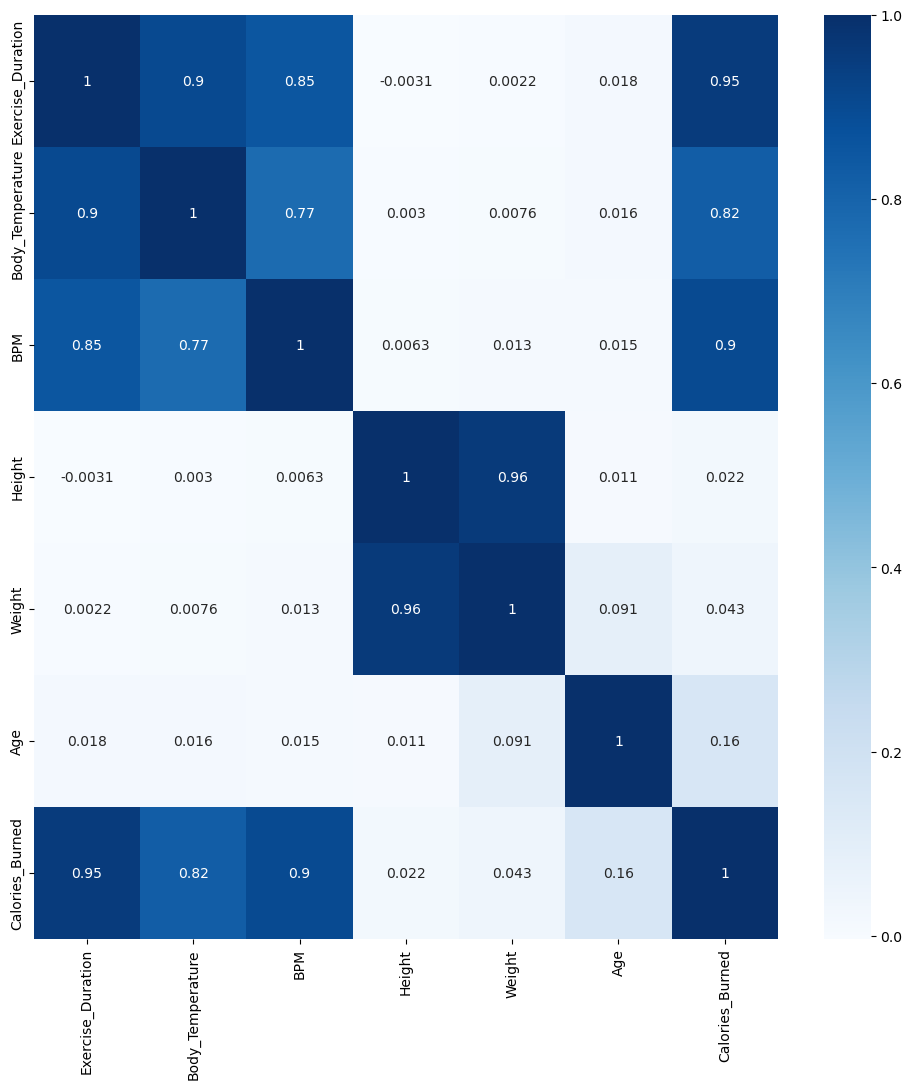

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), annot=True, cmap="Blues")
plt.show()

In [20]:
train.corr().style.background_gradient()

,Exercise_Duration,Body_Temperature,BPM,Height,Weight,Age,Calories_Burned
Exercise_Duration,1.000000,0.904314,0.853489,-0.003146,0.002236,0.017734,0.954783
Body_Temperature,0.904314,1.000000,0.770707,0.002979,0.007554,0.016474,0.824379
BPM,0.853489,0.770707,1.000000,0.006319,0.012562,0.014702,0.899900
Height,-0.003146,0.002979,0.006319,1.000000,0.957816,0.011184,0.021906
Weight,0.002236,0.007554,0.012562,0.957816,1.000000,0.090536,0.042568
Age,0.017734,0.016474,0.014702,0.011184,0.090536,1.000000,0.159624
Calories_Burned,0.954783,0.824379,0.899900,0.021906,0.042568,0.159624,1.000000


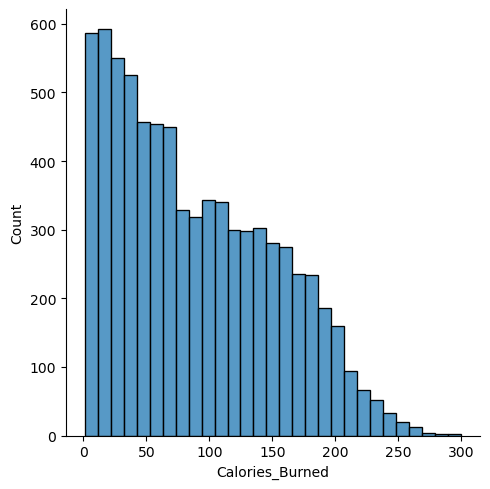

In [21]:
sns.displot(train['Calories_Burned'])
plt.show()
#칼로리 버닝은 뒤로 갈수록 그 횟수가 줄어든다.? 

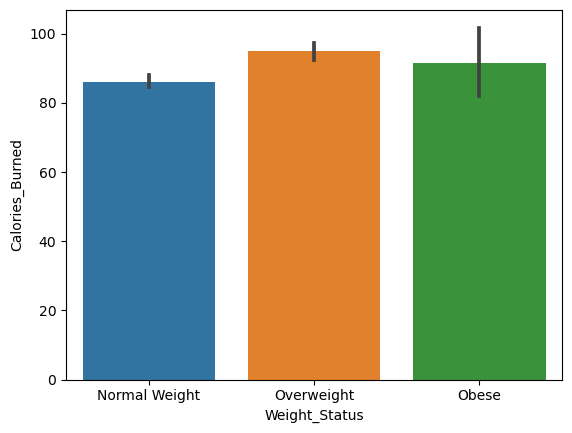

In [22]:
sns.barplot(x = train['Weight_Status'], y=train['Calories_Burned'])
plt.show()
# 체중의상태: 데이터셋에서 무거운사람의 분포가 더 많다. 

# ML 


## DecisionTreeRegressor

Decision tree 모델은 다음과 같은 경우에 사용할 수 있습니다:

분류(Classification): Decision tree 모델은 범주형(target variable이 discrete한 값) 데이터에 대한 분류(Classification)에 사용될 수 있습니다. 예를 들어, 스팸 메일 필터링, 고객 신용 평가, 질병 진단 등과 같은 문제에서 사용할 수 있습니다.

회귀(Regression): Decision tree 모델은 연속형(target variable이 연속적인 값) 데이터에 대한 회귀(Regression)에도 사용될 수 있습니다. 예를 들어, 주택 가격 예측, 판매량 예측, 주식 가격 예측 등과 같은 문제에서 사용할 수 있습니다.

해석 가능성 필요한 경우: Decision tree 모델은 분류나 회귀 결과를 해석하기 쉽게 나타내기 때문에, 모델의 결과를 이해하고 해석해야 하는 경우에 유용합니다. 모델의 분기점(split point)들과 결정 규칙(decision rules)을 시각적으로 확인할 수 있어, 모델의 예측을 해석하고 설명하기 쉽습니다.

비선형 관계를 가진 데이터: Decision tree 모델은 비선형(non-linear) 관계를 가진 데이터를 다룰 수 있습니다. 데이터가 복잡한 비선형 패턴을 가지고 있을 때, Decision tree 모델은 선형 모델보다 더 좋은 성능을 발휘할 수 있습니다.

Feature의 중요도 파악이 필요한 경우: Decision tree 모델은 Feature(입력 변수)들의 중요도를 평가할 수 있습니다. 트리 모델에서 Feature가 선택되는 순서를 통해 각 Feature의 중요도를 파악할 수 있습니다. 이를 통해 Feature의 영향력을 평가하고, Feature 선택이나 Feature 엔지니어링에 도움을 줄 수 있습니다.

작은 규모의 데이터셋: Decision tree 모델은 작은 규모의 데이터셋에도 적용하기 좋습니다. 데이터의 크기가 작은 경우에도 Decision tree 모델은 높은 정확도를 갖고, 빠르게 학습하고 예측할 수 있습니다.

In [23]:
X_train = train.drop(['ID', 'Calories_Burned'], axis = 1)
y_train = train['Calories_Burned']

X_test = test.drop('ID', axis =1)

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

# Define the ordinal features that need to be encoded
ordinal_features = ['Weight_Status', 'Gender']

# Loop through the ordinal features and perform label encoding
for feature in ordinal_features:
    le = LabelEncoder()
    le.fit(train[feature])
    train.loc[:, feature] = le.transform(train[feature].copy())
    test.loc[:, feature] = le.transform(test[feature].copy())

# Split the data into X_train, y_train, X_test, and perform model fitting
X_train = train.drop(['ID', 'Calories_Burned'], axis=1)
y_train = train['Calories_Burned']
X_test = test.drop('ID', axis=1)


C:\Users\dk749\AppData\Local\Temp\ipykernel_10088\210373632.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, feature] = le.transform(train[feature].copy())


In [25]:
X_train.shape ,X_test.shape, y_train.shape 

((7500, 8), (7500, 8), (7500,))

In [26]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [27]:
preds = model.predict(X_test)

In [28]:
submit= pd.read_csv('data/칼로리/sample_submission.csv')

In [29]:
submit.head()

,ID,Calories_Burned
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0


In [30]:
submit['Calories_Burned'] = preds

In [31]:
submit.head(2)

,ID,Calories_Burned
0,TEST_0000,174.0
1,TEST_0001,178.0


In [32]:
#submit.to_csv('./Calories.DTR.csv', index = False)

## Catboost

In [33]:
train = train.set_index(['ID'])
test = test.set_index(['ID'])

In [34]:
label_name = 'Calories_Burned'

X = train.drop(columns=label_name)
y = train[label_name]

In [35]:
cat_features = [] # 문자열 이기 때문에 넣어줌.  
target_col = 'Calories_Burned'

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, TRAIN_0000 to TRAIN_7499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Exercise_Duration  7500 non-null   float64
 1   Body_Temperature   7500 non-null   float64
 2   BPM                7500 non-null   float64
 3   Height             7500 non-null   float64
 4   Weight             7500 non-null   float64
 5   Weight_Status      7500 non-null   int32  
 6   Gender             7500 non-null   int32  
 7   Age                7500 non-null   int64  
 8   Calories_Burned    7500 non-null   float64
dtypes: float64(6), int32(2), int64(1)
memory usage: 527.3+ KB


In [37]:
from catboost import CatBoostRegressor
catb = CatBoostRegressor(
         cat_features=cat_features,
         loss_function='MAE',
         n_estimators=500, 
         learning_rate=0.05, 
         random_state=42
    )
    
catb.fit(train.drop(columns=[target_col]), train[target_col], verbose=100)

0:	learn: 50.4069656	total: 155ms	remaining: 1m 17s
100:	learn: 2.7912882	total: 399ms	remaining: 1.58s
200:	learn: 1.6723527	total: 706ms	remaining: 1.05s
300:	learn: 1.1657402	total: 943ms	remaining: 624ms
400:	learn: 0.8999556	total: 1.15s	remaining: 284ms
499:	learn: 0.7535147	total: 1.37s	remaining: 0us


In [38]:
predict_y =  catb.predict(test)

In [39]:
predict_y[:5]

array([173.39495564, 189.1355516 ,  52.83109773, 158.505463  ,
       227.40040859])

In [40]:
submit['Calories_Burned'] = predict_y
submit.head(2)

,ID,Calories_Burned
0,TEST_0000,173.394956
1,TEST_0001,189.135552


In [41]:
#submit.to_csv('./Calories.Cat.csv', index = False)